In [356]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results"))
df = df[df["select_seed_dataset"].str.endswith("200000")]
df = df[df["select_label_strategy"] == "auto"]
len(df)


In [ ]:
print(df["dataset"].value_counts(), "\n")
print(df["select_full_dataset_size"].value_counts(), "\n")
print(df["select_batch_fill_strategy"].value_counts(), "\n")

dataset
ag_news_10000    109
dbpedia_10000     86
Name: count, dtype: int64 

select_full_dataset_size
500      43
1000     42
5000     40
10000    36
20000    34
Name: count, dtype: int64 

select_batch_fill_strategy
random            40
topk              35
topk_balanced     35
bottomk           34
greedy_batched    31
greedy            20
Name: count, dtype: int64 



In [ ]:
[col for col in df.columns if ("eval" in col or "dataset" in col)]

['dataset',
 'dataset_size',
 'eval_every',
 'select_seed_dataset',
 'select_full_dataset_size',
 'num_eval_epochs',
 'best_eval_loss',
 'best_eval_accuracy',
 'dataset_sinkhorn_distance',
 'dataset_full_ot_distance',
 'dataset_jaccard_overlap_examples',
 'dataset_jaccard_overlap_vocabulary']

In [ ]:
df["seed"].value_counts()

seed
43    100
42     95
Name: count, dtype: int64

In [ ]:
df["dataset"].value_counts()

dataset
ag_news_10000    109
dbpedia_10000     86
Name: count, dtype: int64

In [ ]:
df["select_projection_dim"].value_counts()

select_projection_dim
4096    195
Name: count, dtype: int64

In [ ]:
df["select_label_strategy"].value_counts()

select_label_strategy
auto    195
Name: count, dtype: int64

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_jaccard_overlap_vocabulary"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], ascending=False)

best_eval_accuracy  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                       
dbpedia_10000 nq_200000           20000                    topk_balanced                         0.856934   
                                                           topk                                  0.458984   
                                                           random                                0.851562   
                                                           greedy_batched                        0.846680   
                                                           bottomk                               0.473145   
                                  10000                    topk_balanced                         0.833984   
                                                           topk                                  0.336914   
                                                           random                                0.820801   
                                                           greedy_batched                        0.833496   
                                                           bottomk                               0.286621   
                                  5000                     topk_balanced                         0.804688   
                                                           topk                                  0.166016   
                                                           random                                0.794922   
                                                           greedy_batched                        0.802734   
                                                           greedy                                0.772461   
                                                           bottomk                               0.274902   
                                  1000                     topk_balanced                         0.670898   
                                                           topk                                  0.262695   
                                                           random                                0.622559   
                                                           greedy_batched                        0.663574   
                                                           greedy                                0.648438   
                                                           bottomk                               0.187500   
                                  500                      topk_balanced                         0.531250   
                                                           topk                                  0.140137   
                                                           random                                0.550293   
                                                           greedy_batched                        0.559570   
                                                           bottomk                               0.113770   
              msmarco_200000      20000                    topk_balanced                         0.836914   
                                                           topk                                  0.570312   
                                                           random                                0.828125   
                                                           greedy_batched                        0.833984   
                                                           bottomk                               0.559570   
                                  10000                    topk_balanced                         0.798340   
                                                           topk                                  0.351562   
                                                           random                                0.762695   
                                                      

<Axes: xlabel='select_full_dataset_size', ylabel='best_eval_accuracy'>

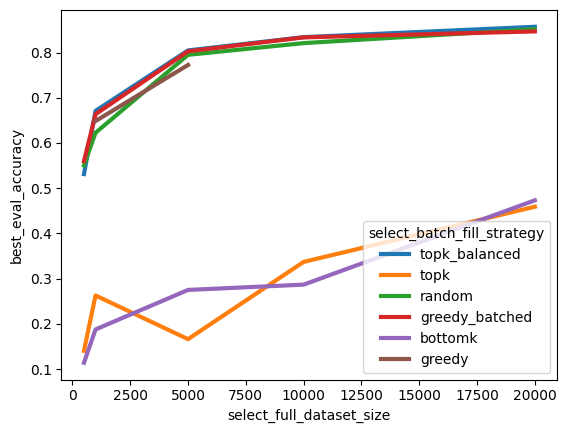

In [ ]:
import seaborn as sns


rdf = df.groupby(dv_cols)[iv_cols].mean().sort_values(by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], ascending=False)
rdf = rdf.reset_index()
rdf = rdf[rdf["dataset"] == "dbpedia_10000"]
rdf = rdf[rdf["select_seed_dataset"].str.contains("nq")]
# rdf = rdf[rdf["dataset"] == "dbpedia_10000"]
# rdf = rdf[rdf["select_batch_fill_strategy"] == "greedy_batched"]

sns.lineplot(
    data=rdf,
    x="select_full_dataset_size",
    y="best_eval_accuracy",
    hue="select_batch_fill_strategy",
    # hue="dataset",
    lw=3,
)
